In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def test_mqi(test_G, sets):
    my_answers = []
    for s1 in sets:
        s2, cond1, cond2 = MQI(test_G, s1)
        # my_answers.append(s2)
        # print("MQI result for", s1, ":", s2)

        print("Conductance of original cluster: ", cond1)
        print("Conductance of improved cluster: ", cond2)
        print("Modularity of original cluster: ", my_modularity(test_G, s1))
        print("Modularity of improved cluster: ", my_modularity(test_G, s2))
        # print('-----------')

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        G = nx.Graph(test_G)
        pos = nx.spring_layout(G)

        labels = {node: str(node) for node in G.nodes()}

        for node in pos:
            if node in s2:
                pos[node][0] -= 0.5
            else:
                pos[node][0] += 0.5

        node_colors1 = ['blue' if node in s1 else 'lightgray' for node in G.nodes()]
        nx.draw(G, pos, ax=ax1, node_color=node_colors1, with_labels=True, labels=labels)
        nx.draw_networkx_edges(G, pos, ax=ax1)
        ax1.set_title('До применения алгоритма MQI')

        highlighted_nodes = [node for node in s1 if node not in s2]
        node_colors2 = ['red' if node in highlighted_nodes else 'blue' if node in s2 else 'lightgray' for node in
                        G.nodes()]
        nx.draw(G, pos, ax=ax2, node_color=node_colors2, with_labels=True, labels=labels)
        nx.draw_networkx_edges(G, pos, ax=ax2)
        ax2.set_title('После применения алгоритма MQI')

        plt.show()
    return my_answers

In [6]:
def read_graph_from_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        while True:
            tmp_str = file.readline()
            if not tmp_str:
                break
            u, v = map(int, tmp_str.split())
            if u not in graph:
                graph[u] = []
            if v not in graph:
                graph[v] = []
            graph[u].append(v)
            graph[v].append(u)
    return graph

In [7]:
def read_sets_from_file(file_path):
    sets = []
    with open(file_path, 'r') as file:
        next(file)
        current_set = []
        for line in file:
            elements = line.strip().split(', ')
            elements[-1] = elements[-1].replace(";", "")
            current_set.extend([int(elem) for elem in elements])
            if ';' in line:
                sets.append(current_set)
                current_set = []
    return sets

In [8]:
def read_answers_from_file(file_path):

    dictionary = {}

    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            key, value = line.strip().split()
            dictionary[int(key)] = value

    return dictionary

In [9]:
def check_equal_values(dictionary, keys):
    values = set(dictionary[key] for key in keys)
    return len(values) == 1

In [12]:
graph = read_graph_from_file('cluster-improvement-datasets/simple_edgelist.txt')
sets = read_sets_from_file('cluster-improvement-datasets/simple_R_sets.txt')

Conductance of original cluster:  0.23076923076923078
Conductance of improved cluster:  0.14285714285714285
Modularity of original cluster:  0.28458049886621317
Modularity of improved cluster:  0.23015873015873006


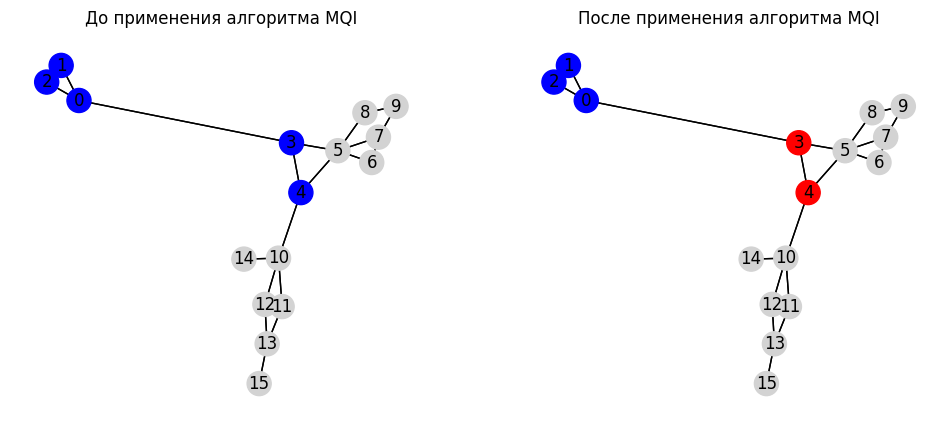

Conductance of original cluster:  0.3333333333333333
Conductance of improved cluster:  0.3333333333333333
Modularity of original cluster:  0.217687074829932
Modularity of improved cluster:  0.217687074829932


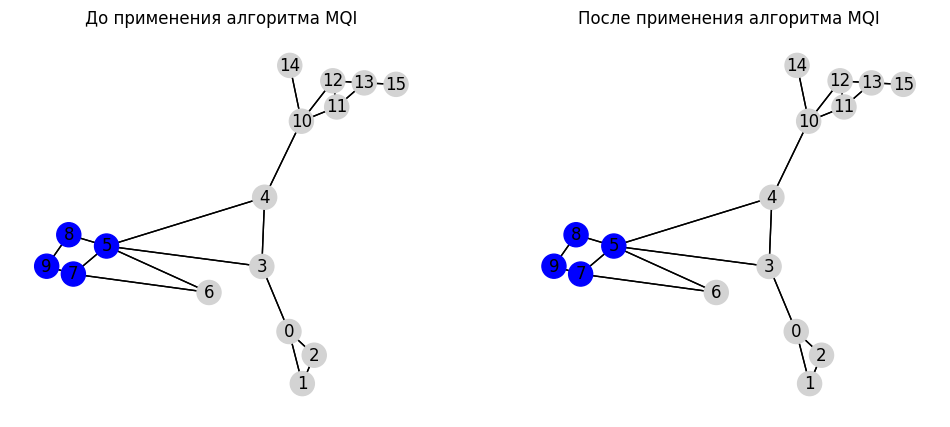

Conductance of original cluster:  0.1111111111111111
Conductance of improved cluster:  0.06666666666666667
Modularity of original cluster:  0.39455782312925175
Modularity of improved cluster:  0.41156462585034004


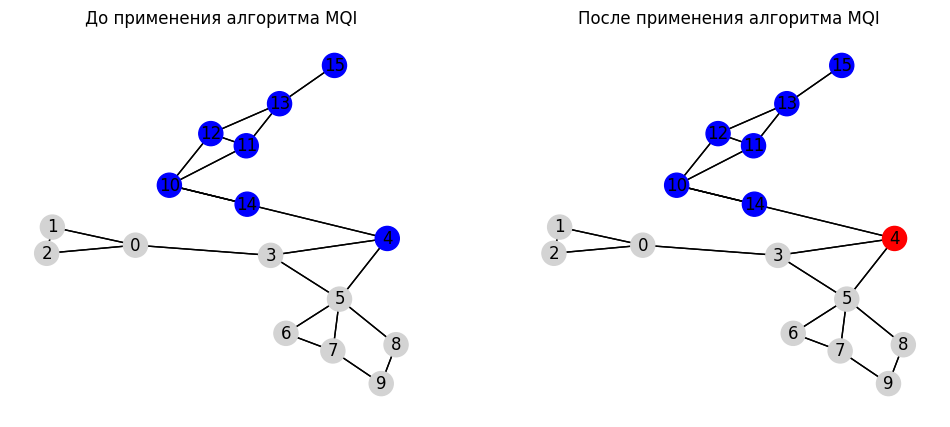

[]

In [13]:
test_mqi(graph, sets)

In [ ]:
graph = read_graph_from_file('cluster-improvement-datasets/sbm_edgelist.txt')
sets = read_sets_from_file('cluster-improvement-datasets/smb_R_sets.txt')
answers = read_answers_from_file('cluster-improvement-datasets/smb_groundtruth.txt')

Conductance of original cluster:  0.2231404958677686
Conductance of improved cluster:  0.21367521367521367
Modularity of original cluster:  0.21992426035502957
Modularity of improved cluster:  0.21827692307692315


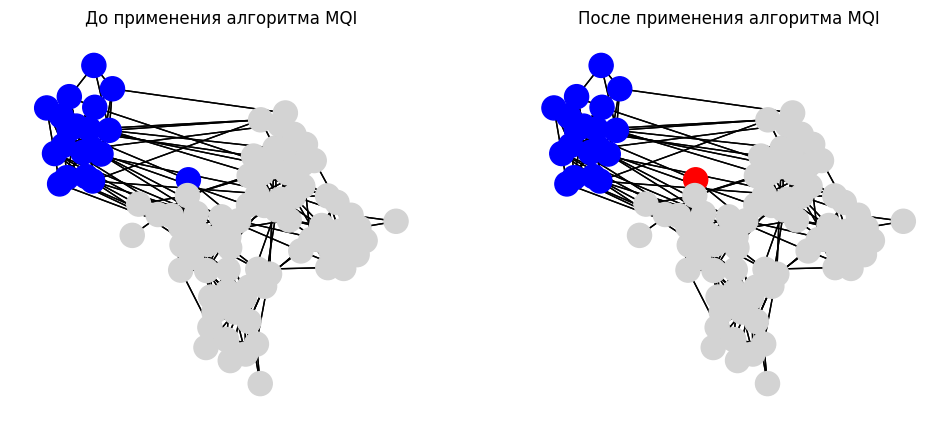

Conductance of original cluster:  0.19117647058823528
Conductance of improved cluster:  0.19083969465648856
Modularity of original cluster:  0.2509065088757396
Modularity of improved cluster:  0.24491834319526634


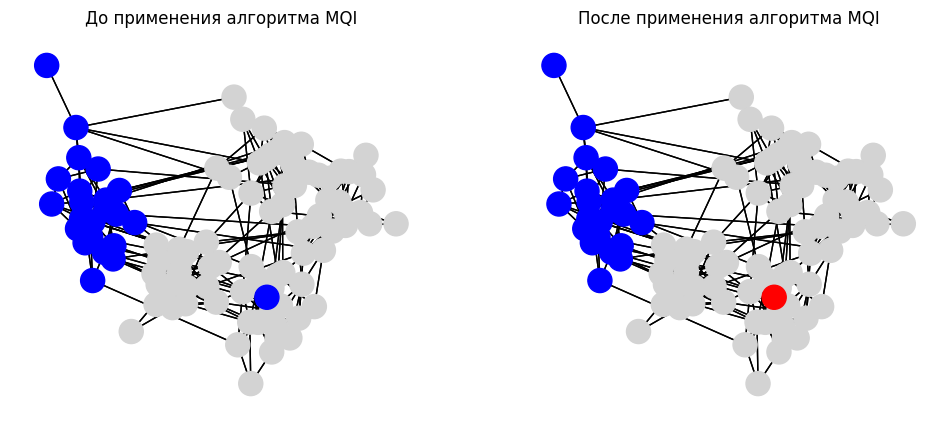

Conductance of original cluster:  0.20279720279720279
Conductance of improved cluster:  0.1935483870967742
Modularity of original cluster:  0.2539692307692307
Modularity of improved cluster:  0.23490650887573974


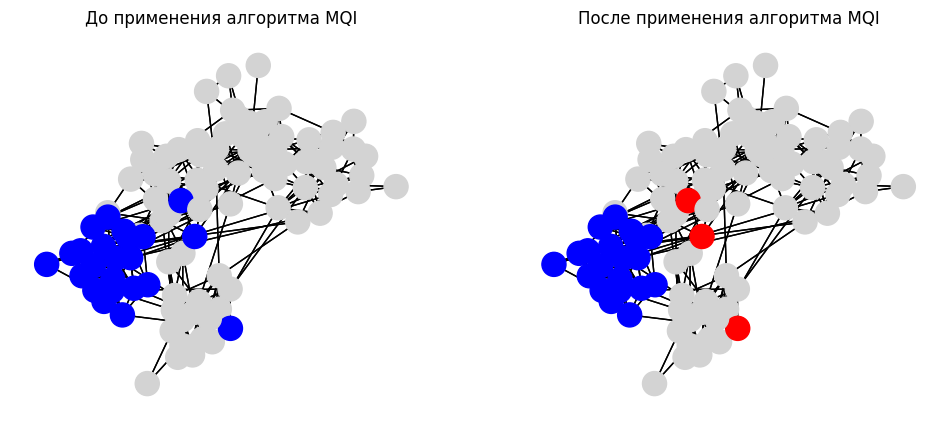

Conductance of original cluster:  0.28125
Conductance of improved cluster:  0.24489795918367346
Modularity of original cluster:  0.20551952662721895
Modularity of improved cluster:  0.18222958579881654


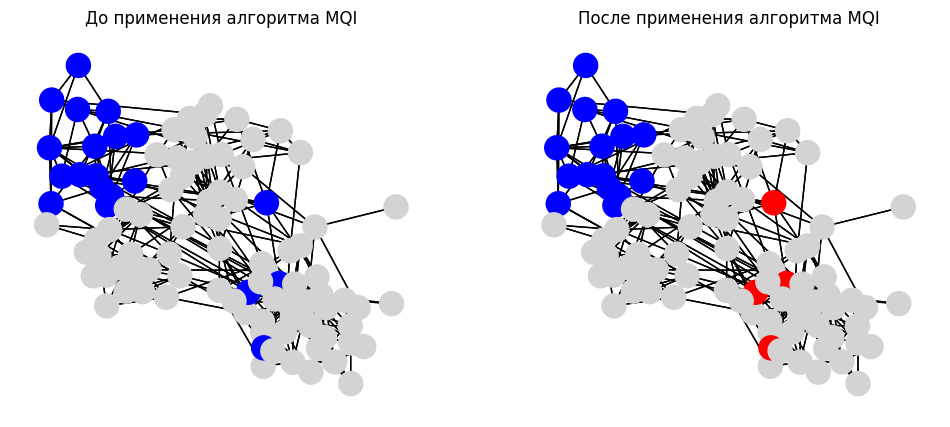

In [ ]:
my_answers = test_mqi(graph, sets)